In [1]:
#hand digit classification

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
#train-test split
#training
print("No of images in images training set {}".format(mnist.train.images.shape))
print("No of images in label training set {}".format(mnist.train.labels.shape))
#test
print("No of images in images test set {}".format(mnist.test.images.shape))
print("No of images in label test set {}".format(mnist.test.labels.shape))

No of images in images training set (55000, 784)
No of images in label training set (55000, 10)
No of images in images test set (10000, 784)
No of images in label test set (10000, 10)


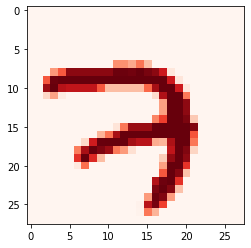

In [6]:
img1 = mnist.train.images[0].reshape(28, 28)
plt.imshow(img1, cmap = "Reds")

In [7]:
#defining number of neurons in layers
num_input = 784
num_hidden1 = 512
num_hidden2 = 256
num_hidden3 = 128
num_output = 10

In [8]:
#placeholders
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])
with tf.name_scope("output"):
    Y = tf.placeholder("float", [None, num_output])

In [9]:
with tf.name_scope("Weights"):
    weights = {
        'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev = 0.1), name = 'weights_1'),
        'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev = 0.1), name = 'weights_2'),
        'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden3], stddev = 0.1), name = 'weights_3'),
        'out': tf.Variable(tf.truncated_normal([num_hidden3, num_output], stddev = 0.1), name = 'weight_4')
    }
#truncated_normal : it is used to model the probabilities
#of the binary outcomes in the probit model and to model censored data in the tobit model.

In [10]:
#biasing
with tf.name_scope('biases'):
    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name = 'bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]), name = 'bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]), name = 'bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]), name = 'bias_4'),
    }

In [11]:
#forward propogation
#we will use relu functions in all layers

with tf.name_scope("Model"):
    with tf.name_scope("layer1"):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
    with tf.name_scope("layer2"):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
    with tf.name_scope("layer3"):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
    with tf.name_scope("output"):
        y_hat = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['out']), biases['out']))

In [12]:
#backpropogation
with tf.name_scope("Loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = Y))
learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [13]:
#accuracy
with tf.name_scope("Accuracy"):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    correct_pred = tf.equal(predicted_digit, actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [14]:
#summary
tf.summary.scalar("Accuracy", accuracy)
tf.summary.scalar("Loss", loss)
merge_summary = tf.summary.merge_all()

In [15]:
#training the model
init = tf.global_variables_initializer()
learning_rate = 1e-4
num_iterations = 1000
batch_size = 128
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter('./graphs', graph = sess.graph)
    for i in range(num_iterations):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict= { X: batch_x, Y:batch_y})
        if i % 100 == 0:
            batch_loss, batch_accuracy, summary = sess.run([loss, accuracy, merge_summary], feed_dict={ X: batch_x, Y:batch_y})
            summary_writer.add_summary(summary,i)
            print('Iteration: {}, Loss:{}'.format(i, batch_loss,batch_accuracy))

2022-04-30 20:40:56.105319: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-30 20:40:56.106136: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Iteration: 0, Loss:2.453235149383545
Iteration: 100, Loss:0.5007684826850891
Iteration: 200, Loss:0.45440128445625305
Iteration: 300, Loss:0.3276500701904297
Iteration: 400, Loss:0.2402748316526413
Iteration: 500, Loss:0.25702691078186035
Iteration: 600, Loss:0.18414843082427979
Iteration: 700, Loss:0.11836256086826324
Iteration: 800, Loss:0.1970120668411255
Iteration: 900, Loss:0.0916593074798584
